# Algorithm 3 - Decision Tree

1. Data Analysis (Check missing value, outlier, all numerical variables, distribution of numerical variables, x Vs y)
2. Feature Engineering -  (Missing value treatment, outlier treatment)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [4]:
df = pd.read_csv("drug200.csv")

In [6]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [14]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [20]:
# Feature Selection

In [39]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [23]:
y = df['Drug']

As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()** or **import category_encoders as ce**
to convert the categorical variable into dummy/indicator variables.

In [34]:
!pip install category_encoders

In [40]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = ['Sex', 'BP', 'Cholesterol'])
X = encoder.fit_transform(X)

In [41]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,1,1,25.355
1,47,2,2,1,13.093
2,47,2,2,1,10.114
3,28,1,3,1,7.798
4,61,1,2,1,18.043
...,...,...,...,...,...
195,56,1,2,1,11.567
196,16,2,2,1,12.006
197,52,2,3,1,9.894
198,23,2,3,2,14.020


In [42]:
# Split into train and test

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 100)

In [102]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 5)
(140,)
(60, 5)
(60,)


In [103]:
# run the model

In [116]:
from sklearn.tree import DecisionTreeClassifier
drugtree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 0)
drugtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [117]:
# prediction for test set
y_pred_test = drugtree.predict(X_test)
from sklearn.metrics import accuracy_score
print("The accuracy of the model is {0:0.4f}".format(accuracy_score(y_test,y_pred_test)))

The accuracy of the model is 0.9833


In [118]:
y_pred_train = drugtree.predict(X_train)
from sklearn.metrics import accuracy_score
print("The accuracy of the model is {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

The accuracy of the model is 1.0000


In [119]:
y_pred_test[0:5]
y_test

126    drugY
104    drugY
99     drugY
92     drugY
111    drugX
167    drugX
116    drugX
96     drugY
52     drugY
69     drugY
164    drugY
124    drugB
182    drugX
154    drugY
125    drugY
196    drugC
194    drugY
177    drugY
163    drugY
31     drugB
11     drugY
73     drugY
15     drugY
41     drugB
97     drugY
128    drugY
133    drugY
82     drugC
139    drugX
123    drugY
83     drugA
65     drugY
151    drugB
162    drugX
170    drugX
77     drugY
32     drugX
173    drugY
174    drugA
85     drugB
168    drugY
112    drugX
171    drugX
181    drugX
7      drugC
46     drugA
75     drugY
28     drugY
29     drugY
195    drugC
40     drugY
153    drugX
115    drugY
64     drugB
59     drugY
1      drugC
192    drugY
136    drugB
152    drugX
161    drugB
Name: Drug, dtype: object

In [108]:
#Evalauation of the model using accuracy_score = TN+TP/(TN+TP+FP+FN) - predicted/all instances

In [109]:
#Visualization of Descision Tree

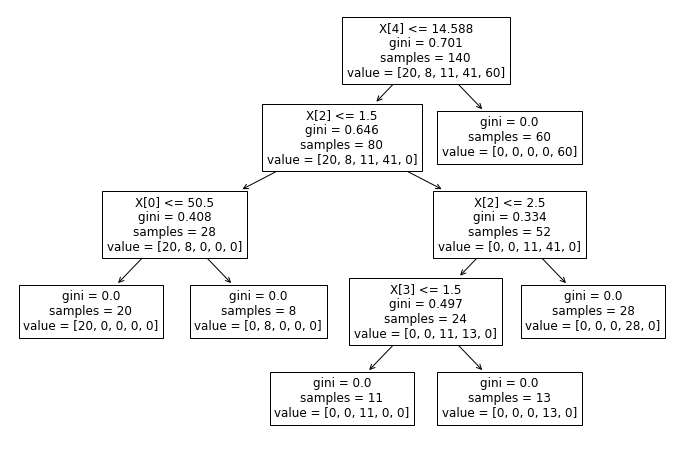

In [120]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(drugtree.fit(X_train, y_train))
plt.show()


In [111]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

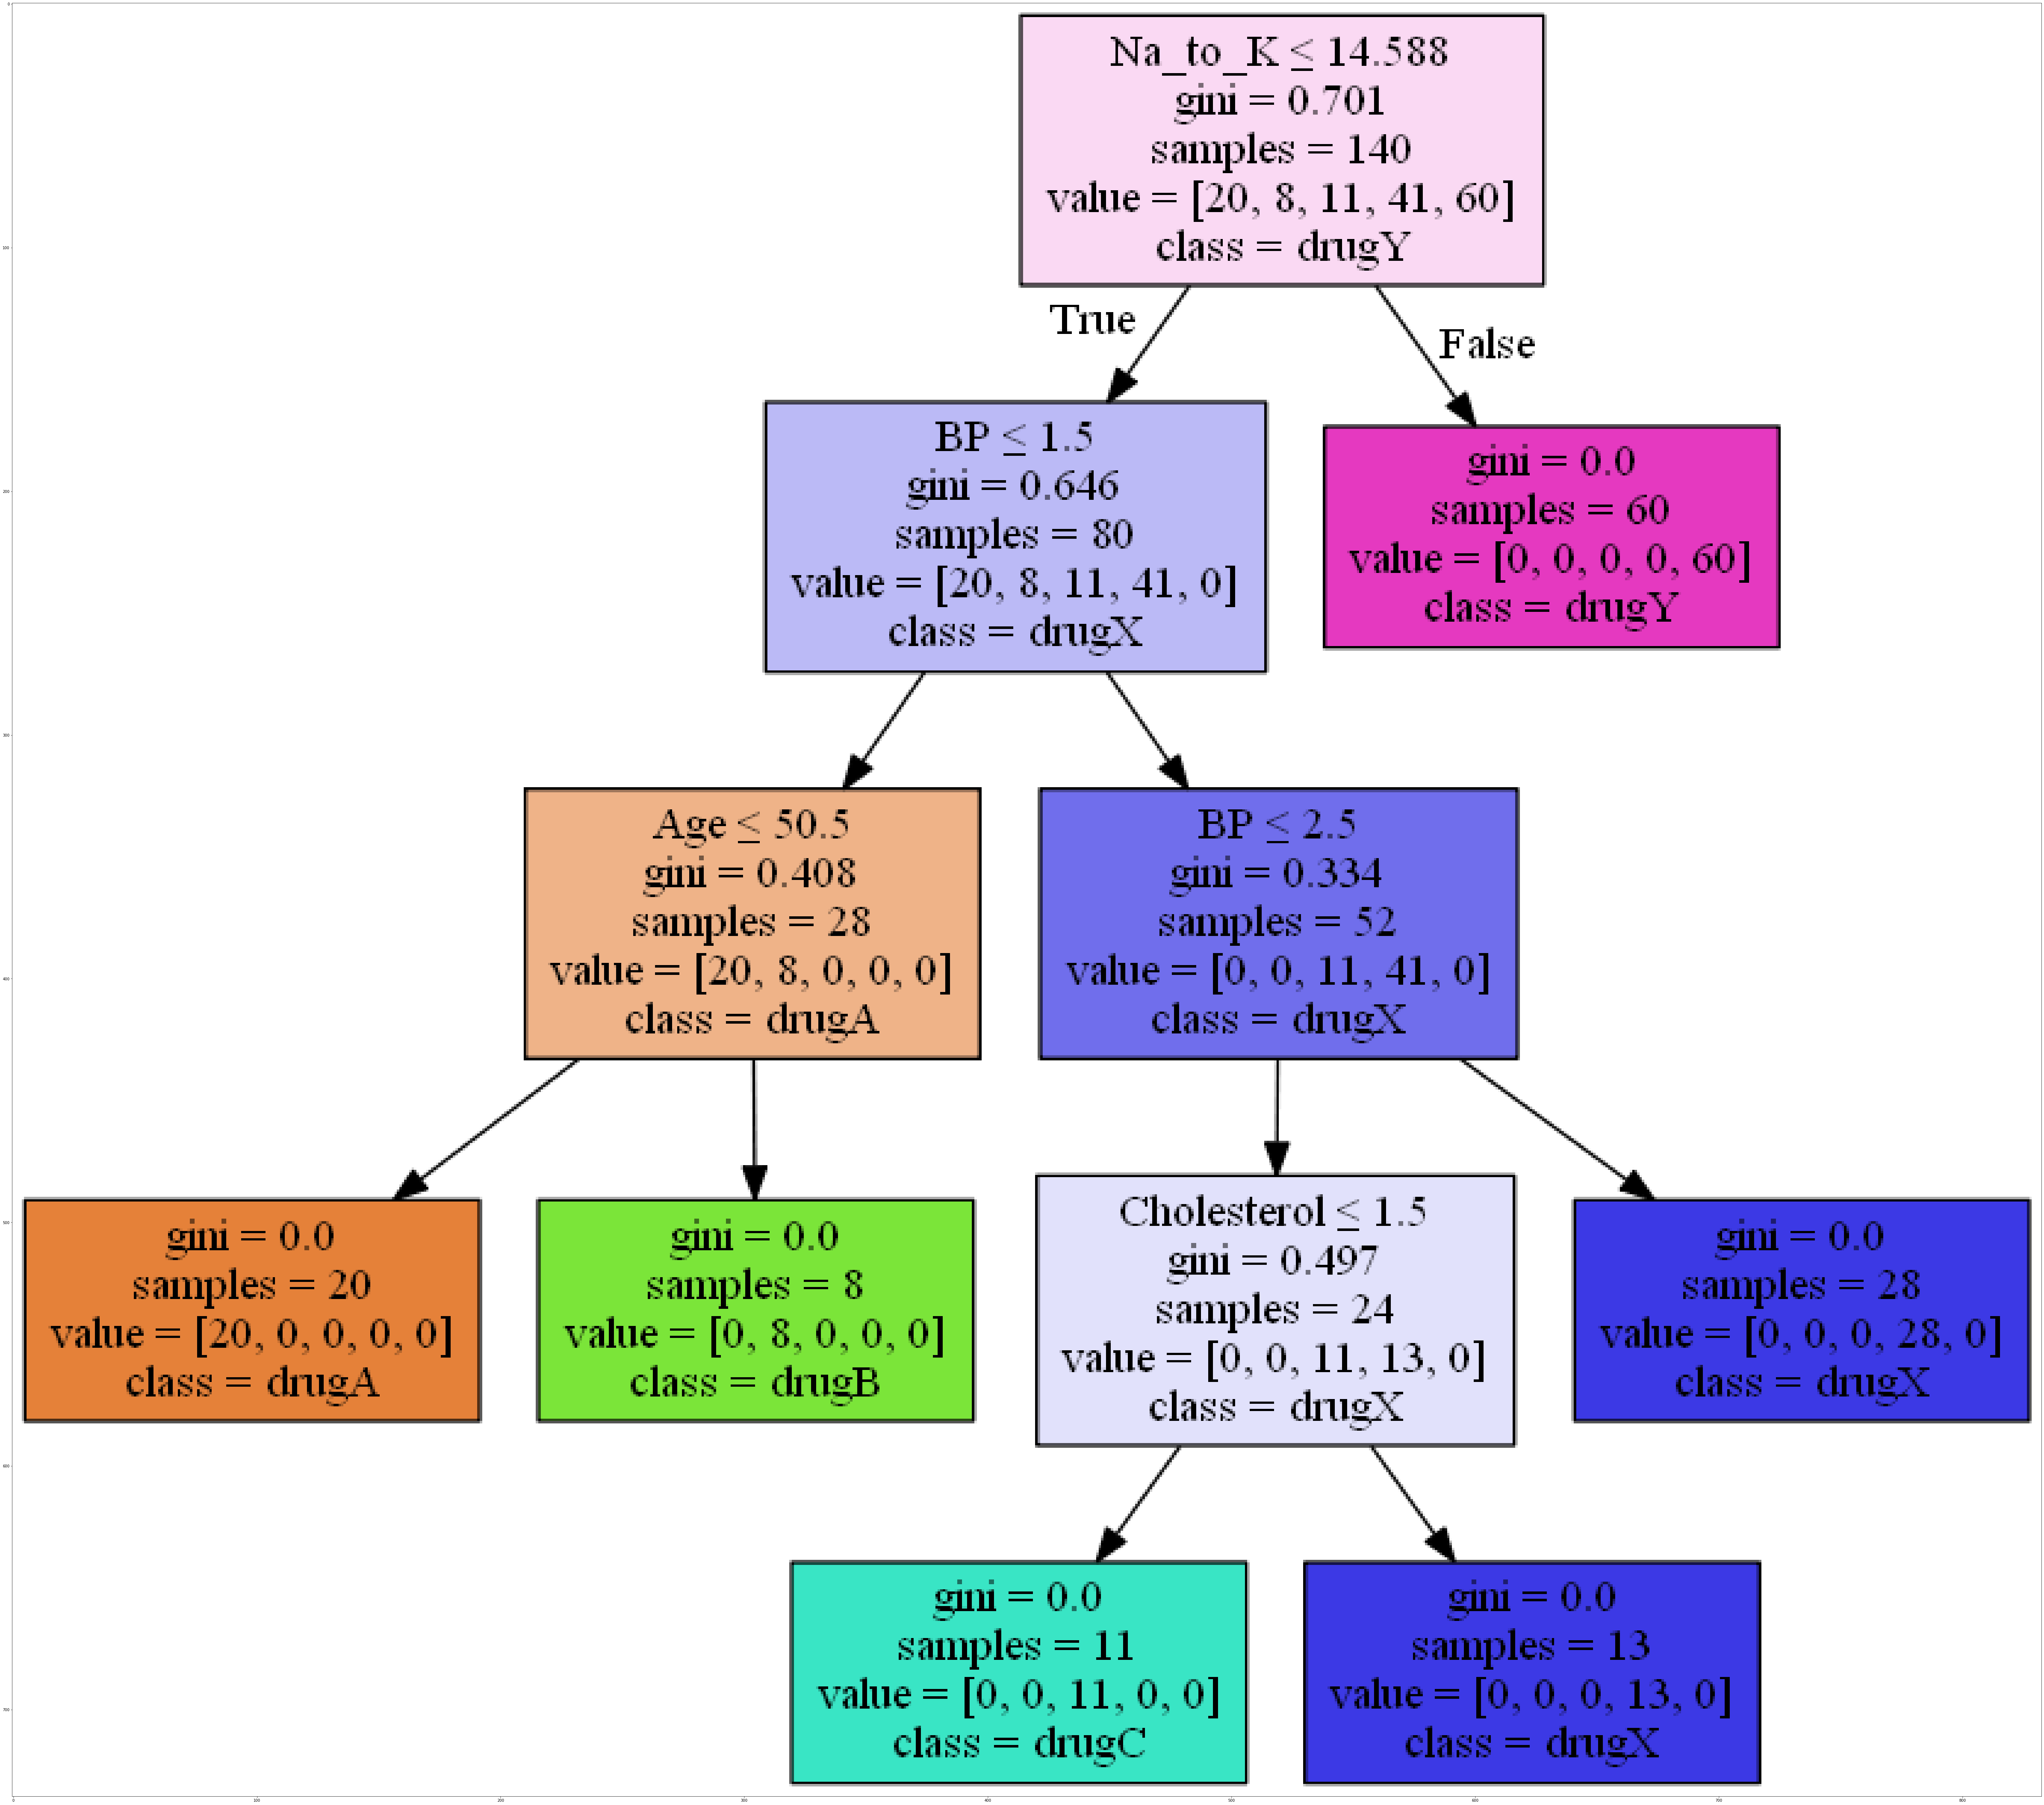

In [112]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = X.columns[0:5]
out = tree.export_graphviz(drugtree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')